In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: Futu

[[  0.99429187   0.87511711  -9.99909683]
 [  0.65761885   0.91624771 -10.18458517]
 [ -6.48804352   3.29034852   6.73159871]
 [  0.5815206    2.06249948  -9.07157495]
 [ -7.42442678   5.30835517   6.86341624]
 [  2.26790487   0.40816482 -10.17230518]
 [  1.62073713  -0.05416228  -9.92461083]
 [  2.41199108   1.03683306  -9.20017913]
 [ -7.62441747   5.87096075   5.41069708]
 [ -7.34160752   3.671108     7.36634568]
 [ -7.56358517   3.5736335    5.34284552]
 [  2.22972735   1.6514787   -7.43386319]
 [ -0.75249891   2.31574949  -9.26873428]
 [  0.54946324   0.5581557   -7.88852506]
 [ -0.4308995    0.48011452  -8.47545896]
 [ -1.19436032   2.54705473  -8.90232874]
 [ -0.06318407   2.4416449  -11.40312057]
 [ -6.70999871   3.8246846    7.34365184]
 [  1.32054601   2.60559237 -10.47729501]
 [  0.15391601   2.19349145  -9.8137736 ]
 [  0.32833903   2.43933589  -9.58711337]
 [ -7.01543966   4.3914134    9.46294692]
 [  0.16543782   1.89916047  -9.03802666]
 [  0.7185004    1.58025637  -9.24

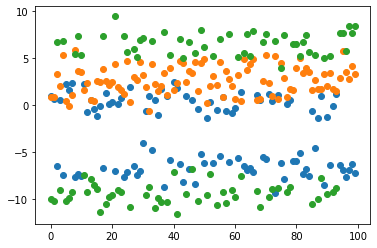

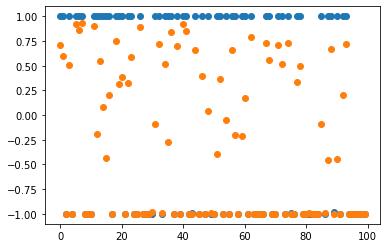

In [7]:
from sklearn.datasets import make_blobs
data,y = make_blobs(n_samples=100, n_features=3,centers=2,random_state=101)

from tensorflow.contrib.layers import fully_connected

num_inputs = 3  # 3 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_outputs = num_inputs # Must be true for an autoencoder!

learning_rate = 0.01

#Placeholder
x = tf.placeholder(tf.float32, shape=[None, 3])

W1=tf.Variable(tf.random_normal([3,2]))   #从服从指定正态分布的序列中随机取出指定个数的值
b1=tf.Variable(tf.zeros([2]))
L1=tf.nn.tanh(tf.matmul(x,W1)+b1)   #激活函数为双曲正切函数
 
W2=tf.Variable(tf.random_normal([2,3]))
b2=tf.Variable(tf.zeros([3]))
outputs=tf.nn.tanh(tf.matmul(L1, W2)+b2)
 
loss = tf.reduce_mean(tf.square(outputs-x))
#使用梯度下降法
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize( loss)
#Init
init = tf.global_variables_initializer()

num_steps = 1000
print(data)
print(y)

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={x: data})

        
    # Now ask for the hidden layer output (the 2 dimensional output)
    #output_2d = hidden.eval(feed_dict={x: data})
    prediction_value=sess.run(L1,feed_dict={x:data})
    plt.figure()
    #plt.scatter(x_data,y_data)
    #plt.plot(x_data,prediction_value,'r-',lw=5)
    print(prediction_value)
    plt.plot(data,'o')
    plt.show()
    plt.plot(prediction_value,'o')
    plt.show()